In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [2]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, iplot, plot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
data = pd.read_csv('housing.csv')

In [4]:
df = data.copy()

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 9 numeric and only 1 categorical variable

In [7]:
df.isnull().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 missing values in column 'total_bedrooms'

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.select_dtypes(np.number).skew()[abs(df.select_dtypes(np.number).skew()) > 0.75]

total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

These are highly skewed columns which will require transformations

<AxesSubplot:>

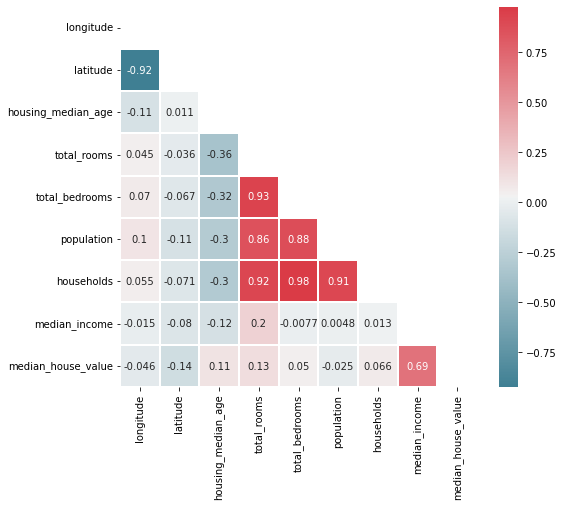

In [10]:
corr = df.corr()
matrix = np.triu(corr)
plt.figure(figsize=(8,7))
cmap = sns.diverging_palette(220,10,75, as_cmap=True, center = 'light')
sns.heatmap(df.corr(), cmap = cmap, linecolor= 'white', linewidths=2, mask=matrix, annot=True)

Some of the independent variables are highly correlated which can have a negative impact on regression model

<AxesSubplot:xlabel='households', ylabel='total_bedrooms'>

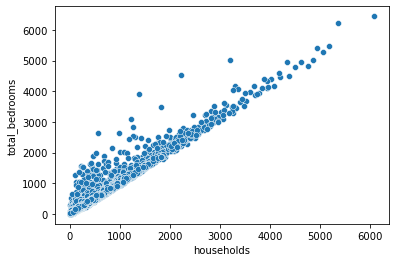

In [11]:
#Checking households vs total_bedrooms
sns.scatterplot(data=df, x = 'households', y = 'total_bedrooms')

These two columns have a strong positive correlation

<AxesSubplot:xlabel='total_rooms', ylabel='total_bedrooms'>

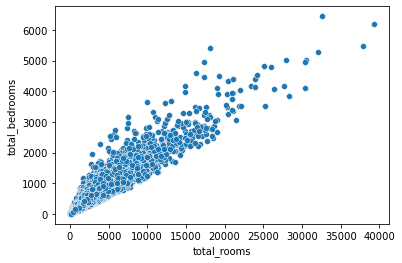

In [12]:
#checking total_rooms vs total_bedrooms
sns.scatterplot(data=df, x = 'total_rooms', y = 'total_bedrooms')

These two columns have a positive correlation

array([<AxesSubplot:title={'center':'housing_median_age'}>,
       <AxesSubplot:title={'center':'total_rooms'}>,
       <AxesSubplot:title={'center':'total_bedrooms'}>,
       <AxesSubplot:title={'center':'population'}>,
       <AxesSubplot:title={'center':'households'}>,
       <AxesSubplot:title={'center':'median_income'}>,
       <AxesSubplot:title={'center':'median_house_value'}>], dtype=object)

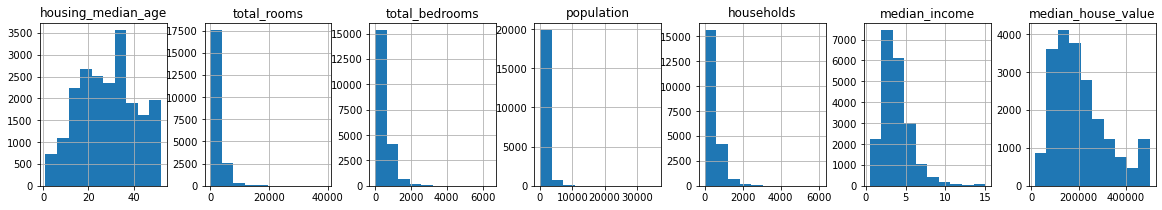

In [13]:
fig, (axes) = plt.subplots(1,7, figsize=(20,3))
df.drop(['latitude', 'longitude', 'ocean_proximity'], axis=1).hist(ax=axes)

There are a lot of skewed columns which will require transformations, as found before.

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploring data 

<AxesSubplot:xlabel='housing_median_age', ylabel='Density'>

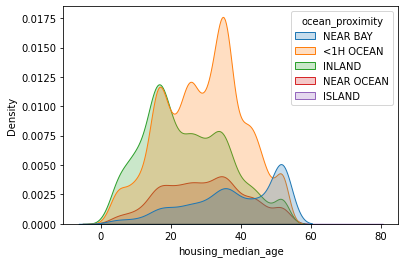

In [15]:
sns.kdeplot(x = df['housing_median_age'], fill=True, hue=df['ocean_proximity'])

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

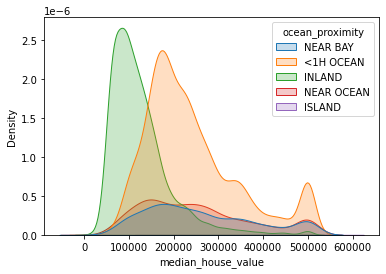

In [16]:
sns.kdeplot(x=df['median_house_value'], hue=df['ocean_proximity'],fill=True )

1)Most of the inland houses have a low median_house_value, followed by Ocean proximity houses

In [17]:
a = df.groupby(by='ocean_proximity')
a.mean()['median_house_value'].sort_values()

ocean_proximity
INLAND        124805.392001
<1H OCEAN     240084.285464
NEAR OCEAN    249433.977427
NEAR BAY      259212.311790
ISLAND        380440.000000
Name: median_house_value, dtype: float64

In [18]:
px.histogram(data_frame=df, x='median_house_value', color = 'ocean_proximity', color_discrete_sequence= px.colors.qualitative.Pastel)

Interactive plot for distribution of median_house_value with respect to ocean_proximity

In [19]:
#sns.pairplot(df.drop(['longitude', 'latitude'], axis=1),hue='ocean_proximity')

<AxesSubplot:xlabel='ocean_proximity', ylabel='population'>

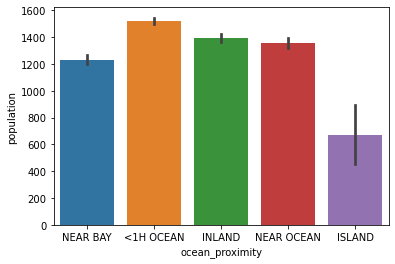

In [20]:
sns.barplot(data=df,x='ocean_proximity', y='population' )

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_income'>

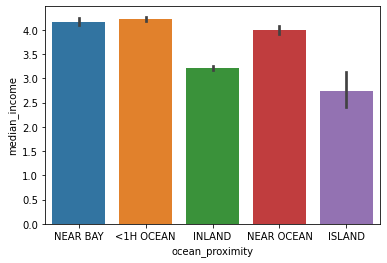

In [21]:
sns.barplot(data=df, x='ocean_proximity', y='median_income')

# -----------------------------------------------------------------------------------------------------------

# Treating missing values

<AxesSubplot:>

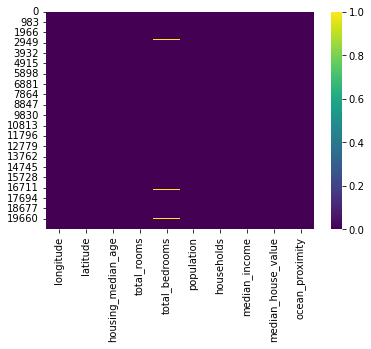

In [22]:
sns.heatmap(df.isnull(), cmap='viridis')

In [23]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

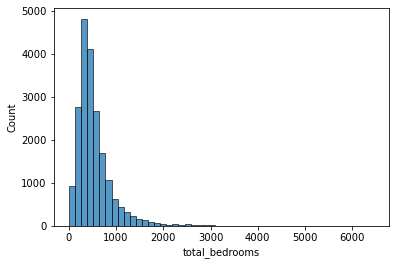

In [24]:
sns.histplot(df['total_bedrooms'], bins=50)

In [25]:
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [26]:
df.shape

(20640, 10)

In [27]:
#Out of 20640, 207 which is almost 1% of total values in missing hence can be dropped 
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop('index', inplace=True, axis=1)

In [28]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20432,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


# Encoding categorical variable

In [29]:
df_encod = pd.get_dummies(df['ocean_proximity'], drop_first=True)

In [30]:
df_encod.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [31]:
df = pd.concat([df_encod, df], axis=1)

In [32]:
df.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,0,1,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,0,0,1,0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,0,0,1,0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,0,0,1,0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,0,0,1,0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
df.drop('ocean_proximity', axis=1, inplace=True)

In [34]:
df.columns = ['inland', 'island', 'near bay', 'near ocean', 'longitude',
       'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value']

In [35]:
df.head()

,inland,island,near bay,near ocean,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,0,1,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,0,0,1,0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,0,0,1,0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,0,0,1,0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,0,0,1,0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Removing skewness

In [36]:
num_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [37]:
df[num_cols].skew()[abs(df[num_cols].skew().values) > 0.75]

total_rooms           4.158816
total_bedrooms        3.459546
population            4.960017
households            3.413850
median_income         1.644557
median_house_value    0.978290
dtype: float64

In [38]:
skewed_cols = df[num_cols].skew()[abs(df[num_cols].skew().values) > 0.75].index.to_list()

In [39]:
skewed_cols

['total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [40]:
#Checking if any column has non positive values
df[skewed_cols].describe()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [41]:
from scipy.stats import boxcox

In [42]:
for col in skewed_cols:
    bc_result = boxcox(df[col])
    print(pd.DataFrame(bc_result[0]).skew())

0    0.124564
dtype: float64
0    0.112714
dtype: float64
0    0.114033
dtype: float64
0    0.116865
dtype: float64
0    0.004938
dtype: float64
0   -0.012096
dtype: float64


In [43]:
lambda_dict = {}

Boxcox is removing skewness from all the columns hence can be applied

In [44]:
for col in skewed_cols:
    #applying transformation
    bc_result = boxcox(df[col])
    #removing original skewed column
    df.drop(col, axis=1, inplace=True)
    #adding transformed column to the dataframe
    df[col] = bc_result[0]
    #saving the lambda in dictionary
    lambda_dict[col] = bc_result[1]
    
    

In [45]:
lambda_dict

{'total_rooms': 0.22085037222482323,
 'total_bedrooms': 0.22469488584095776,
 'population': 0.23589636454109378,
 'households': 0.24538271216646682,
 'median_income': 0.09188496766542596,
 'median_house_value': 0.12427377943115578}

In [46]:
df[num_cols].skew()[abs(df[num_cols].skew().values) > 0.75]

Series([], dtype: float64)

There are no skewed columns in dataframe now

# --------------------------------------------------------------------------------------------------------------

In [47]:
df.head()

,inland,island,near bay,near ocean,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,0,1,0,-122.23,37.88,41.0,15.711183,8.812635,12.313702,9.276867,2.339704,32.548715
1,0,0,1,0,-122.22,37.86,21.0,27.567255,17.043806,22.349787,18.837657,2.336226,31.389704
2,0,0,1,0,-122.24,37.85,52.0,18.129399,10.018273,14.089610,10.438155,2.173976,31.301520
3,0,0,1,0,-122.25,37.85,52.0,17.434442,10.726091,14.606008,11.216602,1.875594,31.149476
4,0,0,1,0,-122.25,37.85,52.0,18.653359,11.335470,14.661511,11.859220,1.434004,31.162306


In [48]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

# Test train split and scaling

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
X.head()

,inland,island,near bay,near ocean,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0,0,1,0,-122.23,37.88,41.0,15.711183,8.812635,12.313702,9.276867,2.339704
1,0,0,1,0,-122.22,37.86,21.0,27.567255,17.043806,22.349787,18.837657,2.336226
2,0,0,1,0,-122.24,37.85,52.0,18.129399,10.018273,14.089610,10.438155,2.173976
3,0,0,1,0,-122.25,37.85,52.0,17.434442,10.726091,14.606008,11.216602,1.875594
4,0,0,1,0,-122.25,37.85,52.0,18.653359,11.335470,14.661511,11.859220,1.434004


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [54]:
X.select_dtypes(np.number).nunique()[X.select_dtypes(np.number).nunique().values > 2]

longitude               844
latitude                861
housing_median_age       52
total_rooms            5911
total_bedrooms         1923
population             3879
households             1809
median_income         12825
dtype: int64

In [55]:
scale_cols =X.select_dtypes(np.number).nunique()[X.select_dtypes(np.number).nunique().values > 2].index.to_list()

In [56]:
X_train[scale_cols] = sc_x.fit_transform(X_train[scale_cols])
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))

In [57]:
X_train

,inland,island,near bay,near ocean,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5595,0,0,0,1,0.645764,-0.896932,-0.601993,0.192170,0.700453,0.530985,0.724340,-1.037626
12195,1,0,0,0,1.504492,-0.939081,-1.474892,-1.792804,-2.039565,-2.174530,-2.056571,1.268040
2324,1,0,0,0,-0.043216,0.545508,-1.951019,-0.724615,-0.973196,-0.865629,-0.992977,0.738616
12314,1,0,0,0,1.784078,-0.999963,-0.363929,0.459427,1.194246,2.032226,1.228434,-1.460304
13381,1,0,0,0,1.125054,-0.709602,0.112198,0.098410,-0.298623,0.026534,-0.421580,-0.938114
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,0,0,0.805527,-0.901615,-0.363929,0.462461,0.158451,0.274627,0.110770,0.945778
11964,0,0,0,0,1.020209,-0.882882,-1.871664,1.553763,1.327766,1.629579,1.407684,0.672365
5390,0,0,0,0,0.580860,-0.765801,1.064451,-0.425320,-0.276011,-0.314192,-0.212537,-0.267895
860,0,0,1,0,-1.226463,0.901435,-1.316183,1.515377,1.376058,1.727016,1.506326,0.887520


In [58]:
y_train

array([[ 0.52213793],
       [ 1.18780195],
       [-0.7927343 ],
       ...,
       [ 1.13100943],
       [ 0.4363375 ],
       [ 0.5928791 ]])

In [59]:
X_test[scale_cols] = sc_x.transform(X_test[scale_cols])
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

# Regression models

# Stats model

In [60]:
import statsmodels.api as sm

In [61]:
X_train_sm = sm.add_constant(X_train)

C:\Users\Gunwant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [62]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [63]:
lr.params

const                 0.170544
inland               -0.471383
island                1.024784
near bay             -0.105426
near ocean           -0.082296
longitude            -0.557590
latitude             -0.586682
housing_median_age    0.078808
total_rooms          -0.243233
total_bedrooms        0.555978
population           -0.477425
households            0.183714
median_income         0.634186
dtype: float64

In [64]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2534.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:38:13   Log-Likelihood:                -11414.
No. Observations:               13690   AIC:                         2.285e+04
Df Residuals:                   13677   BIC:                         2.295e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1705      0.008     20.336      0.000       0.154       0.187
inland                -0.4714      0.018    -26.648      0.000      -0.506      -0.437
island                 1.0248      0.395      2.598      0.009       0.251       1.798
near bay              -0.1054      0.019     -5.593      0.000      -0.142      -0.068
near ocean            -0.0823      0.016     -5.247      0.000      -0.113      -0.052
longitude             -0.5576      0.021    -27.126      0.000      -0.598      -0.517
latitude              -0.5867      0.022    -27.036      0.000      -0.629      -0.544
housing_median_age     0.0788      0.005     14.330      0.000       0.068       0.090
total_rooms           -0.2432      0.023    -10.670      0.000      -0.288      -0.199
total_bedrooms         0.5560      0.030     18.286      0.000       0.496       0.616
population            -0.4774      0.013    -36.486      0.000      -0.503      -0.452
households             0.1837      0.028      6.559      0.000       0.129       0.239
median_income          0.6342      0.008     78.784      0.000       0.618       0.650
==============================================================================
Omnibus:                     1482.729   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6342.731
Skew:                           0.468   Prob(JB):                         0.00
Kurtosis:                       6.201   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif_1 = pd.DataFrame()

In [67]:
vif_1['Features'] = X_train.columns

In [68]:
vif_1['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

In [69]:
vif_1.sort_values(by = 'VIF Factor', ascending=False)

,Features,VIF Factor
8,total_bedrooms,40.286518
10,households,34.572239
7,total_rooms,22.362314
5,latitude,17.804390
4,longitude,16.929046
9,population,7.523218
11,median_income,2.769582
0,inland,2.037151
2,near bay,1.449322
6,housing_median_age,1.332450


As found in earlier analysis, total_bedrooms column should be dropped

In [70]:
X_train.drop(['total_bedrooms'], axis=1, inplace=True)

In [71]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

C:\Users\Gunwant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [72]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     2669.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:38:13   Log-Likelihood:                -11579.
No. Observations:               13690   AIC:                         2.318e+04
Df Residuals:                   13678   BIC:                         2.327e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1869      0.008     22.151      0.000       0.170       0.203
inland                -0.5258      0.018    -29.794      0.000      -0.560      -0.491
island                 1.1953      0.399      2.994      0.003       0.413       1.978
near bay              -0.1002      0.019     -5.253      0.000      -0.138      -0.063
near ocean            -0.0815      0.016     -5.136      0.000      -0.113      -0.050
longitude             -0.5190      0.021    -25.080      0.000      -0.560      -0.478
latitude              -0.5556      0.022    -25.376      0.000      -0.599      -0.513
housing_median_age     0.0702      0.006     12.655      0.000       0.059       0.081
total_rooms            0.0143      0.018      0.785      0.432      -0.021       0.050
population            -0.5290      0.013    -40.904      0.000      -0.554      -0.504
households             0.5363      0.021     26.081      0.000       0.496       0.577
median_income          0.5560      0.007     80.534      0.000       0.543       0.570
==============================================================================
Omnibus:                     1566.513   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6030.512
Skew:                           0.534   Prob(JB):                         0.00
Kurtosis:                       6.071   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif_2 = pd.DataFrame()

vif_2['Features'] = X_train.columns

vif_2['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif_2.sort_values(by = 'VIF Factor', ascending=False)

,Features,VIF Factor
9,households,18.096306
5,latitude,17.774058
4,longitude,16.835757
7,total_rooms,13.986532
8,population,7.188447
10,median_income,2.011530
0,inland,2.001270
2,near bay,1.442530
6,housing_median_age,1.323123
3,near ocean,1.214327


In [74]:
#Now, will drop households column

In [75]:
X_train.drop(['households'], axis=1, inplace=True)

In [76]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

C:\Users\Gunwant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [77]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     2732.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:38:14   Log-Likelihood:                -11912.
No. Observations:               13690   AIC:                         2.385e+04
Df Residuals:                   13679   BIC:                         2.393e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2033      0.009     23.572      0.000       0.186       0.220
inland                -0.5813      0.018    -32.386      0.000      -0.616      -0.546
island                 1.0792      0.409      2.639      0.008       0.278       1.881
near bay              -0.0860      0.020     -4.403      0.000      -0.124      -0.048
near ocean            -0.0852      0.016     -5.241      0.000      -0.117      -0.053
longitude             -0.5983      0.021    -28.530      0.000      -0.639      -0.557
latitude              -0.6396      0.022    -28.824      0.000      -0.683      -0.596
housing_median_age     0.0728      0.006     12.823      0.000       0.062       0.084
total_rooms            0.3832      0.012     32.918      0.000       0.360       0.406
population            -0.3496      0.011    -31.159      0.000      -0.372      -0.328
median_income          0.4657      0.006     76.107      0.000       0.454       0.478
==============================================================================
Omnibus:                     1170.778   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3138.428
Skew:                           0.487   Prob(JB):                         0.00
Kurtosis:                       5.134   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif_3 = pd.DataFrame()

vif_3['Features'] = X_train.columns

vif_3['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif_3.sort_values(by = 'VIF Factor', ascending=False)

,Features,VIF Factor
5,latitude,17.141562
4,longitude,16.307868
7,total_rooms,5.512440
8,population,5.121372
0,inland,1.982346
9,median_income,1.513380
2,near bay,1.435887
6,housing_median_age,1.322612
3,near ocean,1.213912
1,island,1.001604


In [79]:
X_train.drop(['latitude'], axis=1, inplace=True)

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

C:\Users\Gunwant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [80]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     2775.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:38:14   Log-Likelihood:                -12315.
No. Observations:               13690   AIC:                         2.465e+04
Df Residuals:                   13680   BIC:                         2.473e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2998      0.008     36.629      0.000       0.284       0.316
inland                -0.9395      0.013    -70.434      0.000      -0.966      -0.913
island                 1.3257      0.421      3.148      0.002       0.500       2.151
near bay              -0.0611      0.020     -3.038      0.002      -0.100      -0.022
near ocean             0.0180      0.016      1.101      0.271      -0.014       0.050
longitude             -0.0173      0.006     -2.908      0.004      -0.029      -0.006
housing_median_age     0.0895      0.006     15.378      0.000       0.078       0.101
total_rooms            0.3216      0.012     27.286      0.000       0.298       0.345
population            -0.2798      0.011    -24.797      0.000      -0.302      -0.258
median_income          0.5022      0.006     81.448      0.000       0.490       0.514
==============================================================================
Omnibus:                     1225.754   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2964.384
Skew:                           0.540   Prob(JB):                         0.00
Kurtosis:                       5.007   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
vif_4 = pd.DataFrame()

vif_4['Features'] = X_train.columns

vif_4['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif_4.sort_values(by = 'VIF Factor', ascending=False)

,Features,VIF Factor
6,total_rooms,5.201727
7,population,4.740467
8,median_income,1.397737
2,near bay,1.338828
5,housing_median_age,1.304283
4,longitude,1.288316
0,inland,1.153833
3,near ocean,1.004869
1,island,1.000887


In [82]:
X_train.drop(['total_rooms'], axis=1, inplace=True)

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

C:\Users\Gunwant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [83]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     2873.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:38:14   Log-Likelihood:                -12678.
No. Observations:               13690   AIC:                         2.537e+04
Df Residuals:                   13681   BIC:                         2.544e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2604      0.008     31.485      0.000       0.244       0.277
inland                -0.8569      0.013    -64.242      0.000      -0.883      -0.831
island                 1.5372      0.432      3.556      0.000       0.690       2.385
near bay               0.0008      0.021      0.039      0.969      -0.039       0.041
near ocean             0.0672      0.017      4.033      0.000       0.035       0.100
longitude             -0.0268      0.006     -4.377      0.000      -0.039      -0.015
housing_median_age     0.0654      0.006     11.079      0.000       0.054       0.077
population            -0.0091      0.006     -1.651      0.099      -0.020       0.002
median_income          0.5836      0.006    105.375      0.000       0.573       0.595
==============================================================================
Omnibus:                     1087.383   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2245.127
Skew:                           0.531   Prob(JB):                         0.00
Kurtosis:                       4.676   Cond. No.                         97.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
vif_5 = pd.DataFrame()

vif_5['Features'] = X_train.columns

vif_5['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif_5.sort_values(by = 'VIF Factor', ascending=False)

,Features,VIF Factor
2,near bay,1.337651
4,longitude,1.273517
5,housing_median_age,1.268653
0,inland,1.128488
6,population,1.110463
7,median_income,1.096862
3,near ocean,1.004060
1,island,1.000654


In [85]:
X_train.drop(['near bay'], axis=1, inplace=True)

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

C:\Users\Gunwant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [86]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     3283.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:38:15   Log-Likelihood:                -12678.
No. Observations:               13690   AIC:                         2.537e+04
Df Residuals:                   13682   BIC:                         2.543e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2606      0.007     36.082      0.000       0.246       0.275
inland                -0.8571      0.013    -67.190      0.000      -0.882      -0.832
island                 1.5370      0.432      3.556      0.000       0.690       2.384
near ocean             0.0671      0.016      4.126      0.000       0.035       0.099
longitude             -0.0269      0.005     -5.078      0.000      -0.037      -0.017
housing_median_age     0.0655      0.006     11.243      0.000       0.054       0.077
population            -0.0091      0.006     -1.650      0.099      -0.020       0.002
median_income          0.5837      0.006    105.380      0.000       0.573       0.595
==============================================================================
Omnibus:                     1087.580   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2245.526
Skew:                           0.531   Prob(JB):                         0.00
Kurtosis:                       4.676   Cond. No.                         97.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
vif_6 = pd.DataFrame()

vif_6['Features'] = X_train.columns

vif_6['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif_6.sort_values(by = 'VIF Factor', ascending=False)

,Features,VIF Factor
4,housing_median_age,1.193964
0,inland,1.125279
5,population,1.106397
6,median_income,1.087227
3,longitude,1.026655
2,near ocean,1.003784
1,island,1.000652


# Result of stats model

R squared value is 62.7%, which is very low
VIF Factors are corrected but overall result of model is vey poor

# -----------------------------------------------------------------------------------------------------

# LinearRegression model 

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X.select_dtypes(np.number).nunique()[X.select_dtypes(np.number).nunique().values > 2]

scale_cols =X.select_dtypes(np.number).nunique()[X.select_dtypes(np.number).nunique().values > 2].index.to_list()

X_train[scale_cols] = sc_x.fit_transform(X_train[scale_cols])
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))

X_test[scale_cols] = sc_x.transform(X_test[scale_cols])
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
regressor = LinearRegression()

In [91]:
model_lr = regressor.fit(X_train, y_train)

In [92]:
y_pred = model_lr.predict(X_train)

In [93]:
from sklearn.metrics import r2_score, mean_squared_error

In [94]:
r2_score(y_train, y_pred)

0.6897454858247922

In [95]:
np.sqrt(mean_squared_error(y_train, y_pred))

0.5570049498659844

In [96]:
y_pred_lr_test = model_lr.predict(X_test)

In [97]:
r2_score_lr = r2_score(y_test, y_pred_lr_test)

In [98]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))

In [99]:
r2_score_lr

0.6991073958528304

In [100]:
rmse_lr

0.551143183332594

In [101]:
sns.set_style('darkgrid')

In [102]:
def plot_dist_residual(x):
    plt.figure(figsize=(7,5))
    sns.histplot(data=x, legend=False, bins=50)
    plt.title(f'Distribution of residual')
    plt.text(5, 500, f"Skewness : {round(x[0].skew(),2)}", horizontalalignment='left', size='large', color='black')

In [103]:
def plot_residual_plot(x):
    sns.scatterplot(data=x, legend=False)
    plt.title('Residual plot')
    plt.text(8000, 0, 'No trend in plot', size='large')

In [104]:
res_lr = pd.DataFrame(y_test-y_pred_lr_test)

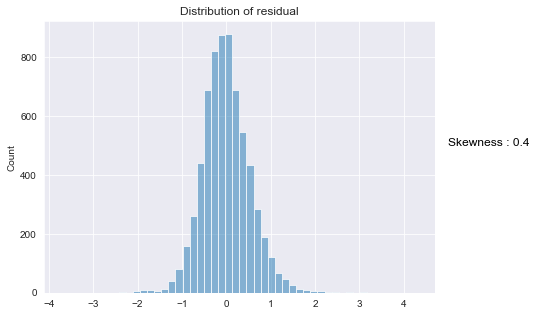

In [105]:
plot_dist_residual(res_lr)

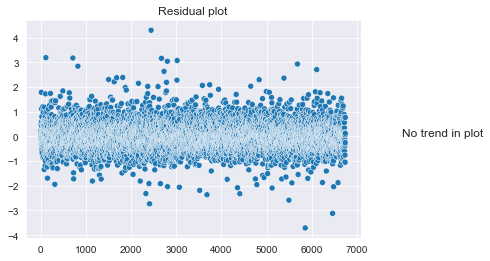

In [106]:
plot_residual_plot(res_lr)

# ML Pipeline using Lasso and ridge regression

In [107]:
from sklearn.model_selection import KFold

In [108]:
kf = KFold(n_splits=5, shuffle=True)

In [109]:
from sklearn.pipeline import Pipeline

In [110]:
from sklearn.preprocessing import PolynomialFeatures

In [111]:
from sklearn.linear_model import Lasso

In [112]:
estimator = Pipeline([('polynomial_feature', PolynomialFeatures()),
                    ('lasso_regression', Lasso(max_iter= 1e4))])

In [113]:
params = {
   'polynomial_feature__degree' : [2,3],
    'lasso_regression__alpha' : np.geomspace(0.0001, 1e0, 10)
}

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
grid = GridSearchCV(estimator, params, cv=kf)

In [116]:
#grid.fit(X_train, y_train)

In [117]:
#grid.best_score_

In [118]:
#grid.best_params_

Best params for lasso_regression

alpha = 0.0002782559402207126
polynomial_degree = 3

In [119]:
lasso = Lasso(alpha = 0.0002)

In [120]:
pf_3 = PolynomialFeatures(degree=3)

In [121]:
X_poly = pf_3.fit_transform(X_train)

In [122]:
model_lasso = lasso.fit(X_poly, y_train)

C:\Users\Gunwant\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1110.789222003989, tolerance: 1.3689999999999993



In [123]:
y_pred_train_lasso = model_lasso.predict(X_poly)

In [124]:
r2_score(y_train, y_pred_train_lasso)

0.7993466301959785

In [125]:
np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))

0.44794348952074464

In [126]:
y_pred_lasso_test = model_lasso.predict(pf_3.transform(X_test))

In [127]:
r2_score_lasso = r2_score(y_test, y_pred_lasso_test)

In [128]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

In [129]:
r2_score_lasso

0.7844412713809908

In [130]:
rmse_lasso

0.46648908932522953

In [131]:
res_lasso = pd.DataFrame(y_test-y_pred_lasso_test.reshape(len(y_pred_lasso_test),1))

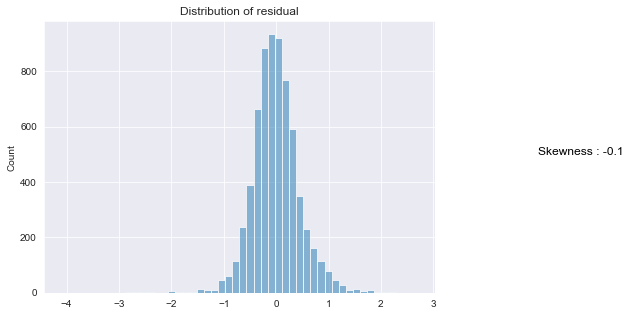

In [132]:
plot_dist_residual(res_lasso)

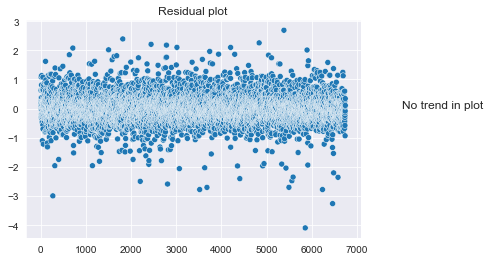

In [133]:
plot_residual_plot(res_lasso)

# -----------------------------------------------------------------------------------------------

# KNN model

In [134]:
from sklearn.neighbors import KNeighborsRegressor

In [135]:
scores_r2= []
scores_rmse = []

In [136]:
for i in range(1,40):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores_r2.append(score)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores_rmse.append(score)
    
    

Text(0.5, 1.0, 'R-squared values')

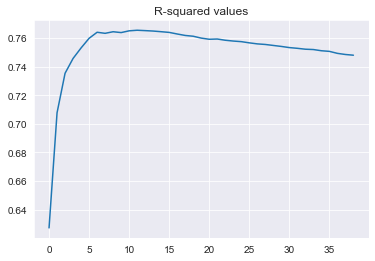

In [137]:
plt.plot(scores_r2)
plt.title('R-squared values')

Text(0.5, 1.0, 'RMSE Values')

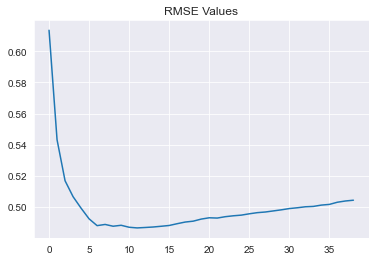

In [138]:
plt.plot(scores_rmse)
plt.title('RMSE Values')

In [139]:
scores_r2 = pd.DataFrame(scores_r2)

In [140]:
scores_r2.columns = ['R2-score']

In [141]:
scores_rmse = pd.DataFrame(scores_rmse)

In [142]:
scores_rmse.columns = ['RMSE']

In [143]:
KNN_results = pd.concat([scores_r2, scores_rmse], axis=1)

In [144]:
KNN_results

,R2-score,RMSE
0,0.627210,0.613467
1,0.707694,0.543223
2,0.735320,0.516916
3,0.745685,0.506693
4,0.753034,0.499318
5,0.759764,0.492467
6,0.763987,0.488120
7,0.763247,0.488885
8,0.764352,0.487742
9,0.763765,0.488350


At k=11, we are getting best results

In [145]:
KNN_model = KNeighborsRegressor(11)

In [146]:
KNN_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [147]:
y_pred = KNN_model.predict(X_train)

In [148]:
r2_score(y_train, y_pred)

0.7988803332844159

In [149]:
np.sqrt(mean_squared_error(y_train, y_pred))

0.4484636737970915

In [150]:
y_pred_KNN_test = KNN_model.predict(X_test)

In [151]:
r2_score_KNN = r2_score(y_test, y_pred_KNN_test)

In [152]:
rmse_KNN = np.sqrt(mean_squared_error(y_test, y_pred_KNN_test))

In [153]:
r2_score_KNN

0.7649885658700849

In [154]:
rmse_KNN

0.4870832332067719

In [155]:
res_KNN = pd.DataFrame(y_test-y_pred_KNN_test)

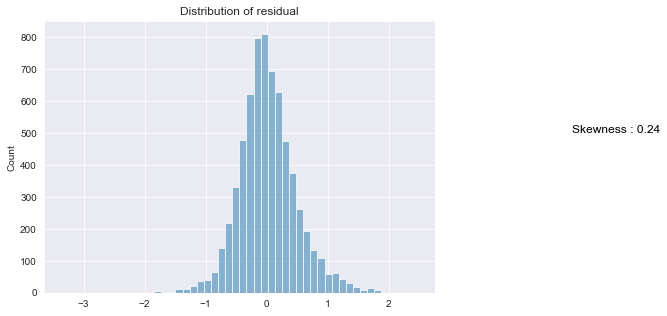

In [156]:
plot_dist_residual(res_KNN)

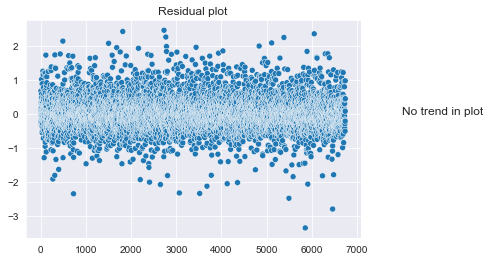

In [157]:
plot_residual_plot(res_KNN)

# Decision Tree

In [158]:
from sklearn.tree import DecisionTreeRegressor

In [159]:
dt = DecisionTreeRegressor()

In [160]:
model_dt = dt.fit(X_train, y_train)

In [161]:
y_pred_dt_train = model_dt.predict(X_train)

In [162]:
r2_score(y_train, y_pred_dt_train)

1.0

In [163]:
np.sqrt(mean_squared_error(y_train, y_pred_dt_train))

9.837218879792002e-17

In [164]:
dt.tree_.max_depth

32

In [165]:
dt.feature_importances_

array([3.16434490e-01, 2.67810751e-06, 6.08720510e-04, 5.32233581e-03,
       1.04891911e-01, 1.17888461e-01, 3.23262422e-02, 2.18128913e-02,
       1.42129246e-02, 2.70818406e-02, 1.58620675e-02, 3.43555437e-01])

In [166]:
param_dt = {
    'max_depth' : range(1,dt.tree_.max_depth +1),
    'max_features' : range(1, len(dt.feature_importances_)+1),
    'min_samples_split':[10,50,60,70],
    'min_samples_leaf': [10,20,30,50]
}

In [167]:
grid_dt = GridSearchCV(DecisionTreeRegressor(),
                      param_grid=param_dt,
                    cv=kf
              )

In [168]:
#grid_dt.fit(X_train, y_train)

In [169]:
#grid_dt.best_score_

In [170]:
#grid_dt.best_params_

grid_dt best_score = 0.7736


grid_dt best params:
max depth = 16,
max features = 11,
min_samples_leaf = 10,
min_samples_split = 10

In [171]:
dt = DecisionTreeRegressor(max_depth=15,
                          max_features=11,
                          min_samples_leaf=10,
                          min_samples_split=10)

In [172]:
model_dt = dt.fit(X_train, y_train)

In [173]:
y_pred_dt_train = model_dt.predict(X_train)

In [174]:
r2_score(y_train, y_pred_dt_train)

0.8744945898064811

In [175]:
np.sqrt(mean_squared_error(y_train, y_pred_dt_train))

0.3542674275085404

In [176]:
y_pred_dt_test = model_dt.predict(X_test)

In [177]:
r2_score_dt = r2_score(y_test, y_pred_dt_test)

In [178]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt_test))

In [179]:
r2_score_dt

0.7703253382248034

In [180]:
rmse_dt

0.4815209936971643

In [181]:
res_dt = pd.DataFrame(y_test-y_pred_dt_test.reshape(len(y_pred_dt_test),1))

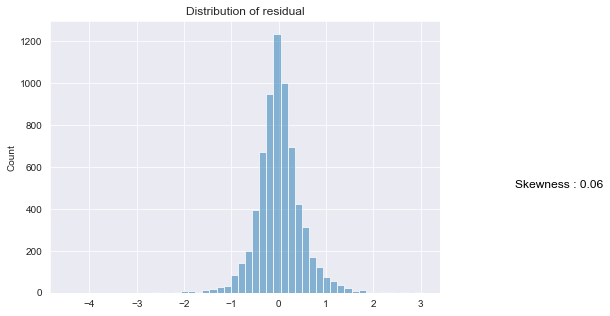

In [182]:
plot_dist_residual(res_dt)

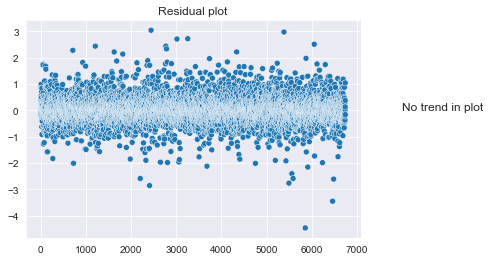

In [183]:
plot_residual_plot(res_dt)

# Random Forest

In [184]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
rf = RandomForestRegressor()

In [186]:
rf = rf.fit(X_train, y_train.ravel())

In [187]:
y_pred_rf_train = rf.predict(X_train)

In [188]:
r2_score(y_train, y_pred_rf_train)

0.9769717933578196

In [189]:
np.sqrt(mean_squared_error(y_train, y_pred_rf_train))

0.151750474932306

In [190]:
from sklearn.model_selection import RandomizedSearchCV

In [191]:
estimator = Pipeline([('rf', RandomForestRegressor())])

In [192]:
params = {
    'rf__n_estimators': [50,100,150,200,250,500],
    'rf__max_depth': [10,15,20,25,30,34],
    'rf__max_features': ['auto', 'sqrt'],
    'rf__min_samples_leaf': [5,10,15,20,25,50],
    'rf__min_samples_split': [5,10,15,20,25,50],
    'rf__bootstrap':[True, False]
}

In [193]:
rf_random = RandomizedSearchCV(estimator, param_distributions=params, n_jobs=-1, scoring='neg_mean_squared_error', cv=kf)

In [194]:
#rf_random.fit(X_train, y_train)

In [195]:
#rf_random.best_score_

In [196]:
#rf_random.best_estimator_

In [197]:
rf = RandomForestRegressor(n_estimators=250,
                          max_depth=15,
                          min_samples_leaf=10,
                          min_samples_split=10, 
                          max_features='sqrt')

In [198]:
model_rf = rf.fit(X_train, y_train.ravel())

In [199]:
y_pred_rf_train = model_rf.predict(X_train)

In [200]:
r2_score(y_train, y_pred_rf_train)

0.8537155878595941

In [201]:
np.sqrt(mean_squared_error(y_train, y_pred_rf_train))

0.38247145271301747

In [202]:
y_pred_rf_test = model_rf.predict(X_test)

In [203]:
r2_score_rf = r2_score(y_test, y_pred_rf_test)

In [204]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

In [205]:
r2_score_rf

0.8034056417357942

In [206]:
rmse_rf

0.44549641045090616

In [207]:
res_rf = pd.DataFrame(y_test-y_pred_rf_test.reshape(len(y_pred_rf_test),1))

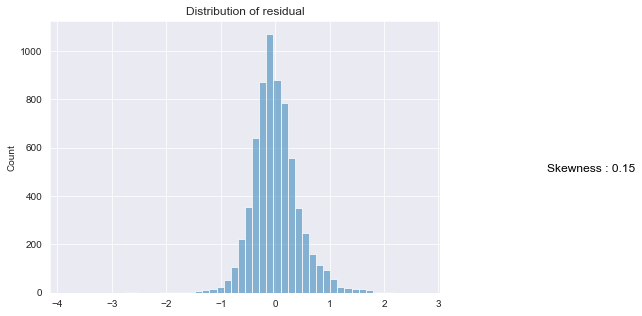

In [208]:
plot_dist_residual(res_rf)

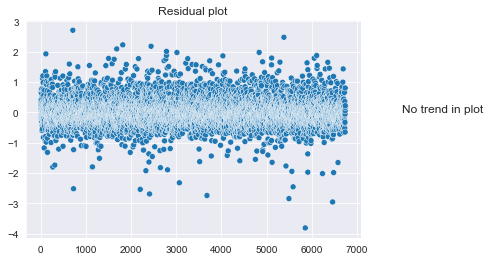

In [209]:
plot_residual_plot(res_rf)

# Comparing Results 

In [210]:
final_result = pd.DataFrame(index=['LinearRegression', 'LassoRegression', 'KNN model', 'DecisionTree', 'RandomForest'])

In [211]:
final_result['r2_score'] = [r2_score_lr, r2_score_lasso, r2_score_KNN, r2_score_dt, r2_score_rf]

In [212]:
final_result['RMSE'] = [rmse_lr, rmse_lasso, rmse_KNN, rmse_dt, rmse_rf]

In [213]:
final_result

,r2_score,RMSE
LinearRegression,0.699107,0.551143
LassoRegression,0.784441,0.466489
KNN model,0.764989,0.487083
DecisionTree,0.770325,0.481521
RandomForest,0.803406,0.445496


# ------------------------------------------------------------------------------------------------------